<center><h1><b>PROJECT</b></h1></center>

In [1]:
library(ggplot2)
library(maps)
library(dplyr)


Caricamento pacchetto: ‘dplyr’


I seguenti oggetti sono mascherati da ‘package:stats’:

    filter, lag


I seguenti oggetti sono mascherati da ‘package:base’:

    intersect, setdiff, setequal, union




---

## GUTHENBERG-RICHTER LAW 
(see wikipedia for more)  
In seismology, the Gutenberg–Richter law[1] (GR law) expresses the relationship between the magnitude and total number of earthquakes in any given region and time period of at least that magnitude.
$$ log_{10} ⁡ N = a − b \cdot M $$

where N is the number of events having a magnitude ≥ M, a and b are constants, i.e. they are the same for all values of N and M.
This relationship between event magnitude and frequency of occurrence is remarkably common, although the values of a and b may vary significantly from region to region or over time.   
Some generalization of this formula have been made.

#### PARAMETER b
The parameter b (commonly referred to as the "b-value") is commonly close to 1.0 in seismically active regions. This means that for a given frequency of magnitude 4.0 or larger events there will be 10 times as many magnitude 3.0 or larger quakes and 100 times as many magnitude 2.0 or larger quakes. There is some variation of b-values in the approximate range of 0.5 to 2 depending on the source environment of the region.[5] A notable example of this is during earthquake swarms when b can become as high as 2.5, thus indicating a very high proportion of small earthquakes to large ones. An earthquake swarm is a sequence of seismic events occurring in a local area within a relatively short period. The time span used to define a swarm varies, but may be days, months, or years. Such an energy release is different from the situation when a major earthquake (main shock) is followed by a series of aftershocks: in earthquake swarms, no single earthquake in the sequence is obviously the main shock. In particular, a cluster of aftershocks occurring after a mainshock is not a swarm. The b-value decrease observed prior to the failure of samples deformed in the laboratory[10] has led to the suggestion that this is a precursor to major macro-failure. Alternatively, a b-value significantly different from 1.0 may suggest a problem with the data set; e.g. it is incomplete or contains errors in calculating magnitude. 

#### PARAMETER a
The a-value represents the total seismicity rate of the region. This is more easily seen when the GR law is expressed in terms of the total number of events: 
$$ N = N_{TOT} \cdot 10^{-bM} $$ 
with $N_{TOT} = 10^{a}$ the total number of events (above M=0). Since $10^{a}$ is the total number of events, $10^{-bM}$ must be the probability of those events. 

#### OTHER MODELS
The basic model is the Gutenberg Richter
(GR) model that states the frequency’s logarithm is linearly
dependent on the magnitude. However, Dargahi-Noubary
(1986) and Kagan (1993) suggest that more suitable sta-
tistical models should be used instead of the GR model for
the distribution with high magnitudes. Petersen et al. (2007)
proposed a time-independent model showing that the prob-
ability of earthquake occurrence follows the Poisson dis-
tribution. Considering the time of earthquakes, stochastic
processes, especially Poisson processes, have also been used
to predict the number of earthquakes. However, the Poisson
model cannot be sufficient since it has an exponential recur-
rence time distribution and a constant hazard function. This
assumes that the probability of observing an earthquake at
any given time is independent of both elapsed time since
the last earthquake and its severity. This assumption leads
only to time-independent seismic hazard estimates. Besides,
earthquakes are clustered in time and space and their distri-
bution is over-dispersed compared to the Poisson law. [5]

In recent times, taking into account the seasonality and
trends of earthquakes, the prediction of the size or mag-
nitude has been performed in a few studies by time series
models such as Auto-Regressive Integrated Moving Aver-
age (ARIMA) and generalized autoregressive conditional
heteroskedasticity (GARCH).

a NEW BETTER MODEL IS The SSA is a nonparametric
novel and powerful time series analysis technique incorpo-
rating classical time series analysis, multivariate statistics,
multivariate geometry, dynamical systems, and signal pro-
cessing. This new method can be useful for the prediction of
the earthquake magnitude in a seismic region.

#### ARIMA MODEL
ARIMA, also known as Box-Jenkins models, is divided into
seasonal and non-seasonal models. Non-seasonal Box-Jenkins
models are generally shown as ARIMA (p, d, q), where
p is the parameter of the autoregression (AR) model, d is
the number of difference procedure, and q is the parameter
of the moving average (MA) model. To perform the analysis processes of the Box-Jenkins
method, first, care should be taken to ensure that the series
is free of trend and seasonal fluctuations, that is, the series
should be stationary. Then, determine the p and q param-
eters depending on the autocorrelation function and the par-
tial autocorrelation function graphs and control the model 
parameters’ significance. Lastly, the root mean square error
criterion (RMSE) is used to selects the best model among
the models having the white noise error series

---

## LOADING AND CLEANING DATA
We took the data from https://earthquake.usgs.gov/ in two parts because there was a limit in the download size.

In [2]:
df1 = read.table("./data/earthquakes_years_2000_2025.csv", header=TRUE, sep=',')
df2 = read.table("./data/earthquakes_years_1925_2000.csv", header=TRUE, sep=',')
cat("The 1st database has ", nrow(df1), " rows", "\n")
cat("The 2nd database has ", nrow(df2), " rows", "\n")
df_raw = rbind(df1, df2)
cat("The final database has ", nrow(df_raw), " rows", "\n")

The 1st database has  13988  rows 
The 2nd database has  14850  rows 
The final database has  28838  rows 


In [3]:
# Convert the time column to Date format:
df_raw$time <- as.POSIXct(df_raw$time, format = "%Y-%m-%dT%H:%M:%OSZ", tz = "UTC")
# let's add the year column:
df_raw$year <- format(df_raw$time, "%Y")

Meaning of the less obvious comlumns:
* depth: Depth of the earthquake in kilometers (km).
* mag: Magnitude of the earthquake
* magType: Type of magnitude used. (maybe we should confront only earthquake with same magtype?)
* nst: Number of seismic stations that reported the event.
* gap: Largest azimuthal gap in station coverage (degrees).
* dmin: Distance to the nearest station (in degrees).
* rms: Root mean square of the travel time residuals (in seconds).
* net: Network that detected the event (e.g., us, ci, hv). It identifies the organization or seismic network responsible.
* id: The unique identifier for the earthquake event. It’s usually a string combining the net code and a unique event code.
* updated: Time the event information was last updated.
* place: Human-readable location (e.g., "10km SE of Town X").
* type: Type of seismic event (earthquake, quarry blast, etc.). But I only downloaded earthquakes so this column should be useless.
* horizontalError: Horizontal location error (in km or m).
* depthError: Error estimate for the depth (in km).
* magError: Error estimate for the magnitude.
* magNst: Number of stations used for magnitude calculation.
* status: Review status of the event (reviewed, automatic). It means whether the data has been automatically generated or manually reviewed by a seismologist.
* locationSource: Agency that determined the location.
* magSource: Agency that determined the magnitude.

In [4]:
summary(df_raw)

      time                            latitude       longitude    
 Min.   :1925-02-07 12:14:58.150   Min.   :35.61   Min.   : 4.66  
 1st Qu.:1990-07-11 12:17:33.473   1st Qu.:39.37   1st Qu.:10.98  
 Median :1999-06-07 03:23:02.495   Median :42.74   Median :15.27  
 Mean   :1997-09-22 00:29:15.603   Mean   :42.17   Mean   :14.92  
 3rd Qu.:2004-10-01 01:05:55.349   3rd Qu.:44.44   3rd Qu.:20.01  
 Max.   :2025-06-24 03:04:54.730   Max.   :47.76   Max.   :20.87  
                                                                  
     depth             mag          magType               nst        
 Min.   : -2.00   Min.   :2.500   Length:28838       Min.   :  0.00  
 1st Qu.:  8.60   1st Qu.:2.700   Class :character   1st Qu.:  7.00  
 Median : 10.00   Median :3.100   Mode  :character   Median : 14.00  
 Mean   : 15.02   Mean   :3.284                      Mean   : 30.35  
 3rd Qu.: 10.00   3rd Qu.:3.600                      3rd Qu.: 35.00  
 Max.   :522.00   Max.   :7.000             

### CLEANING

Not a very good dataset, there are many NA values. In particular many columns are almost useless for this (magError, depthError...).

Let's keep only useful columns in the databse `df`:

In [5]:
df <- df_raw[, c('time', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'id','place','status', 'year') ]
nrow(df)

[1] 28838

In [6]:
# check for NA values in selected columns:
for (col in 1:length(df) ) {
    cat("Number of NA values in column ", col, ": ", sum(is.na( df[1] )), "\n")
}

Number of NA values in column  1 :  0 
Number of NA values in column  2 :  0 
Number of NA values in column  3 :  0 
Number of NA values in column  4 :  0 
Number of NA values in column  5 :  0 
Number of NA values in column  6 :  0 
Number of NA values in column  7 :  0 
Number of NA values in column  8 :  0 
Number of NA values in column  9 :  0 
Number of NA values in column  10 :  0 


#### FILTERS

In [32]:
# Filter (boolean mask) to select only those with magnitude >= 5:
filt_big_magnitude <- (df$mag >=5)
sum(filt_big_magnitude)  # count TRUE values

# Filter (boolean mask) to select only those from Italian territory:
filt_italy <- (grepl("Italy", df$place, ignore.case = TRUE ) )
sum(filt_italy)          # count TRUE values

# Filter (boolean mask) to select only those with depth <= 300:
filt_depth <- (df$depth <=200)
sum(filt_depth)          # count TRUE values

[1] 639

[1] 11271

[1] 28535

---

## ANALYSIS

#### PLOT OF ALL EARTHQUAKES

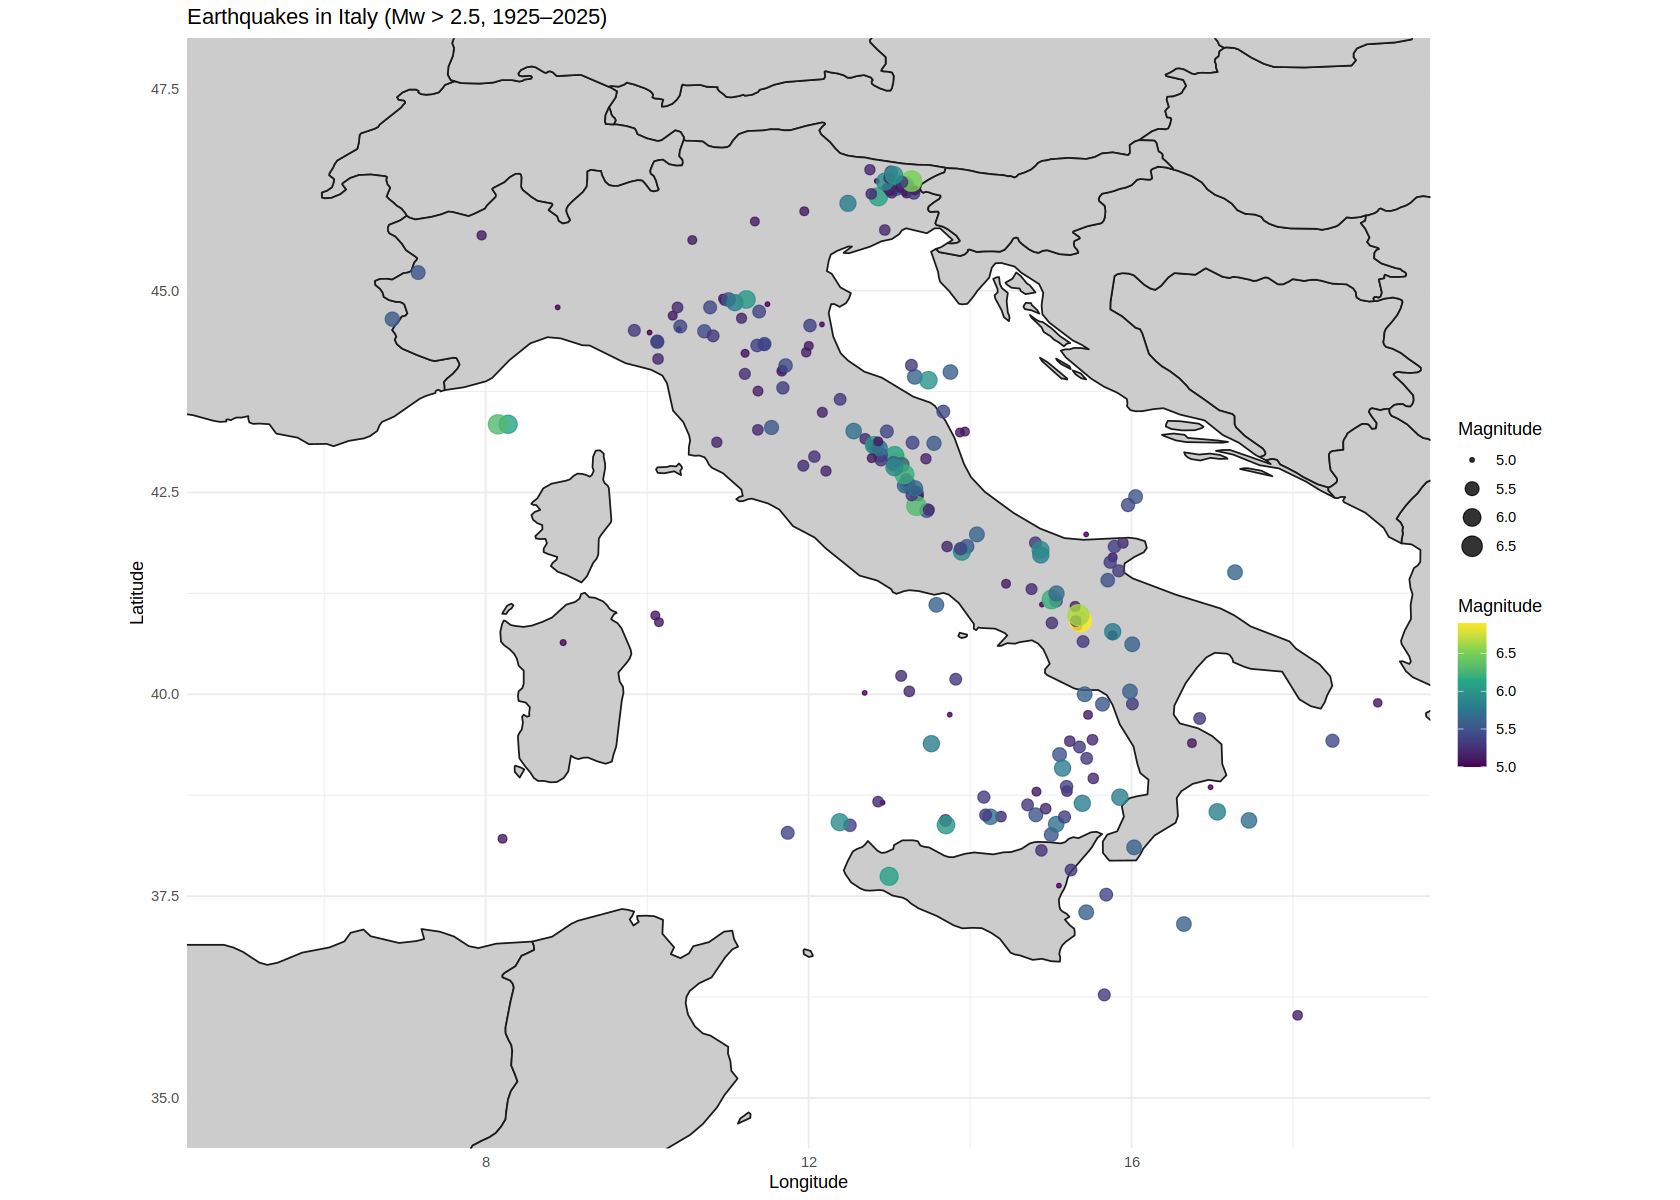

In [16]:
options(repr.plot.width=14, repr.plot.height=10)

ggplot( df[ filt_big_magnitude & filt_italy , ] , aes(x = longitude, y = latitude)) +
  # let's draw the map outline of Italy using the "maps" package
  borders("world", 
          regions = c("Italy", "Germany", "Switzerland", "France", "Austria", "Slovenia", "Croatia", 
                      "Greece", "Albania", 'Bosnia and Herzegovina', 'Hungary', 'Slovakia', 'Liechtenstein', 'Montenegro', 
                      'Serbia', 'Kosovo', 'Romania', 'North Macedonia', 'Tunisia', 'Algeria'), 
          fill = "gray80", colour = "gray10") +
  geom_point(aes(size = mag, color = mag), alpha = 0.8) +
  coord_fixed(xlim = c(5, 19), ylim = c(35, 47.5)) +    #  ensures the aspect ratio is preserved, so the map doesn’t look stretched
  scale_color_viridis_c() +
  labs(title = "Earthquakes in Italy (Mw > 2.5, 1925–2025)",
       x = "Longitude", y = "Latitude", color = "Magnitude", size = "Magnitude") +
  theme_minimal()


#### DENSITY PLOT

Warning message:
“The dot-dot notation (`..level..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(level)` instead.”


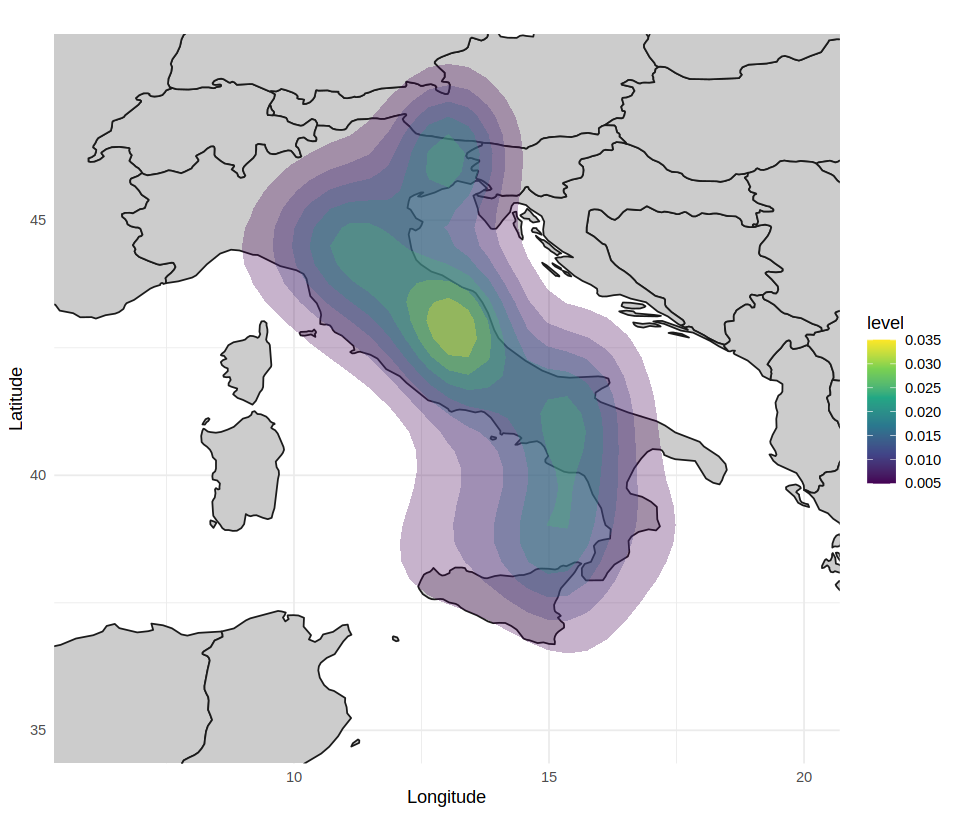

In [9]:
options(repr.plot.width=8, repr.plot.height=7)

ggplot( df[ filt_big_magnitude & filt_italy, ] , aes(x = longitude, y = latitude)) +
  borders("world", 
          regions = c("Italy", "Germany", "Switzerland", "France", "Austria", "Slovenia", "Croatia", 
                      "Greece", "Albania", 'Bosnia and Herzegovina', 'Hungary', 'Slovakia', 'Liechtenstein', 'Montenegro', 
                      'Serbia', 'Kosovo', 'Romania', 'North Macedonia', 'Tunisia', 'Algeria'), 
          , fill = "gray80", colour = "gray10") +
  stat_density_2d(aes(fill = ..level..), geom = "polygon", alpha = 0.3) +
  coord_fixed(xlim = c(6, 20), ylim = c(35, 48)) +
  scale_fill_viridis_c() +
  labs(x = "Longitude", y = "Latitude") +
  theme_minimal()

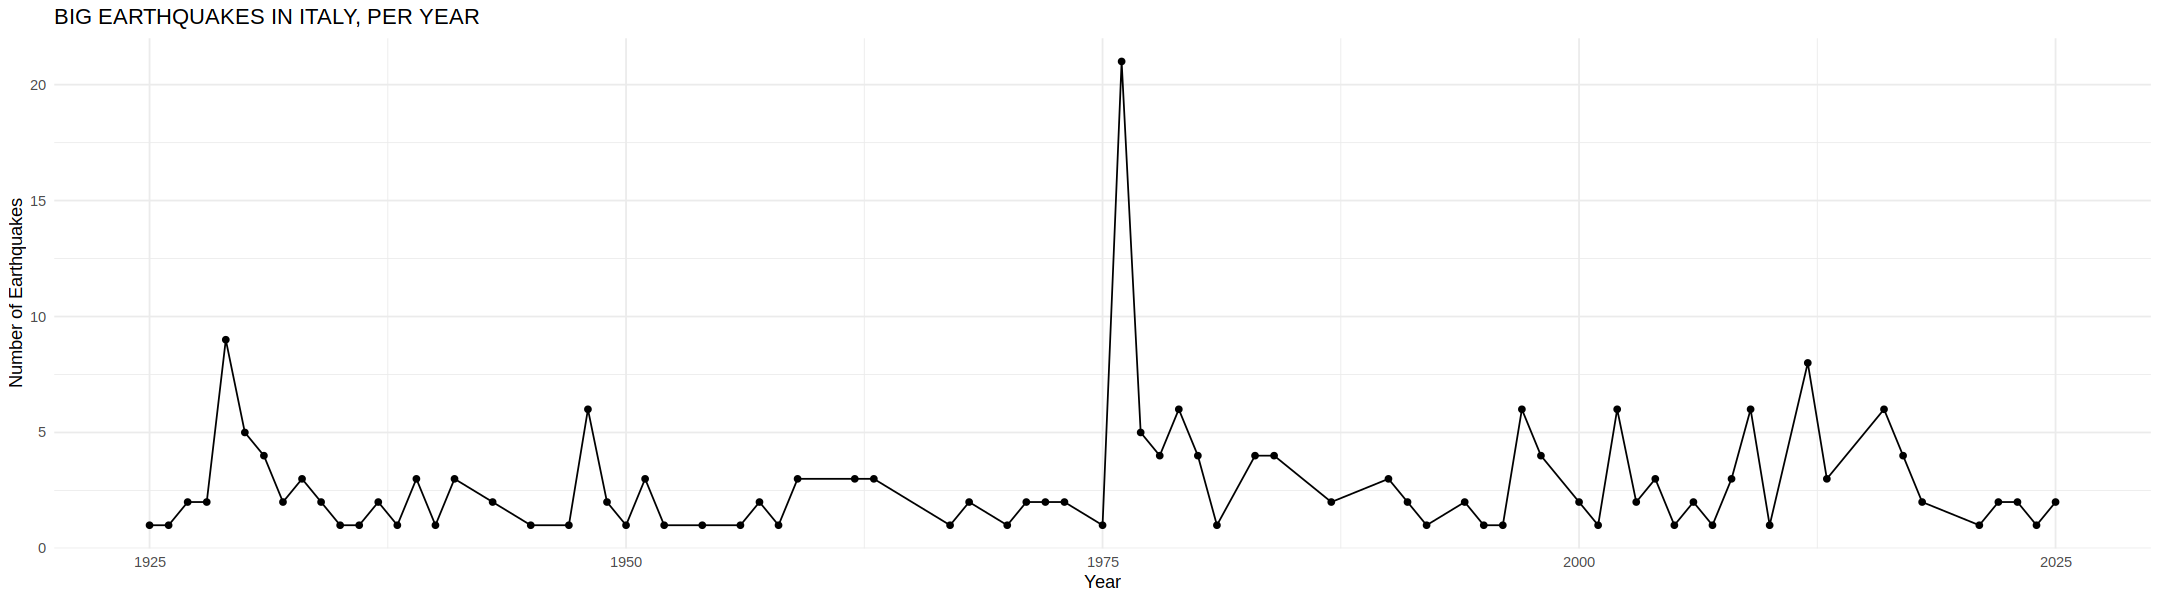

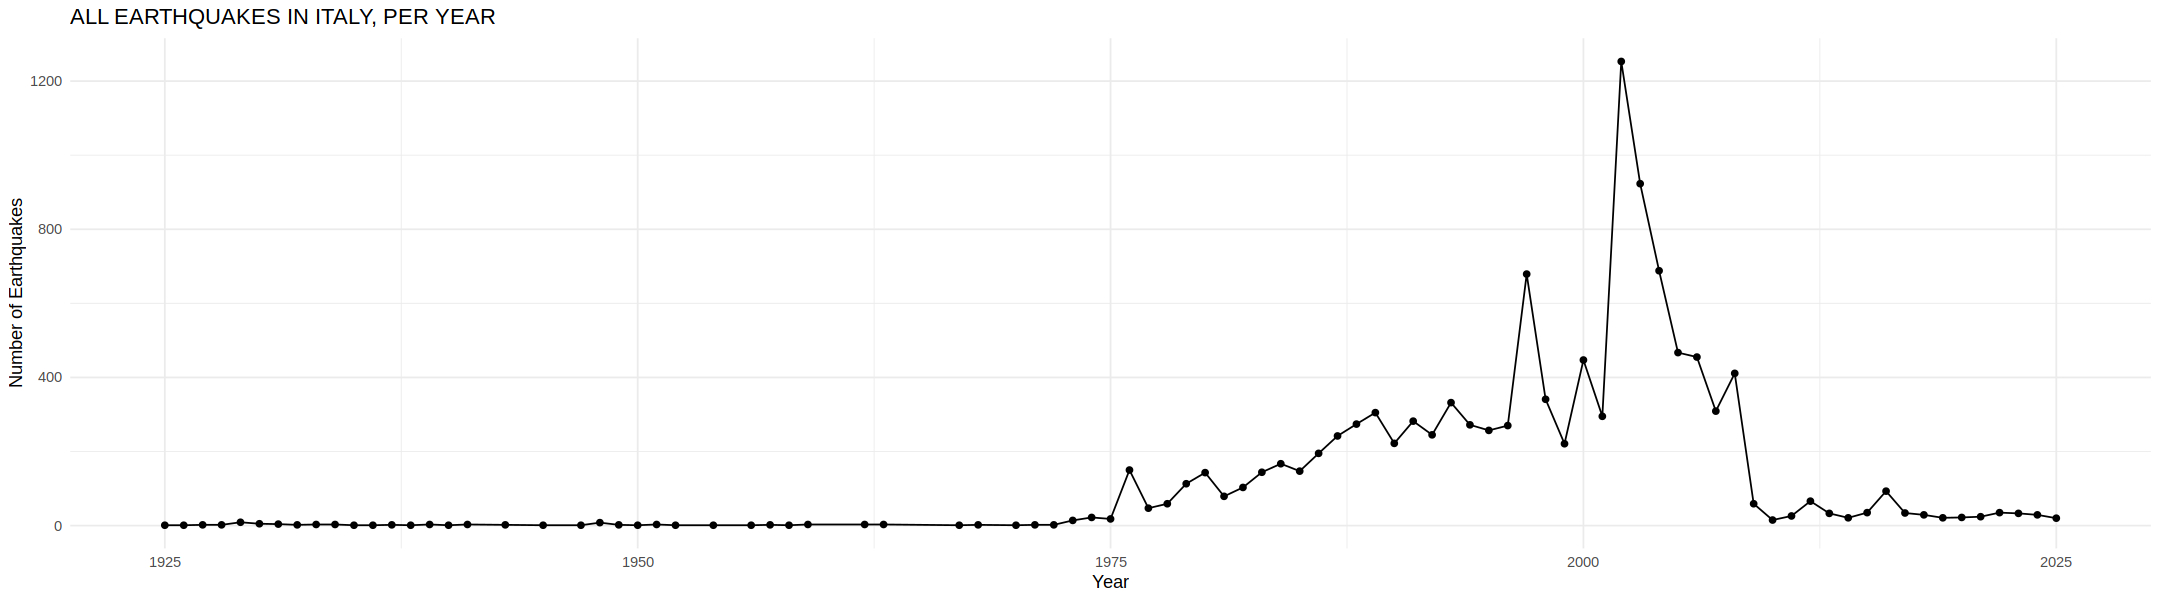

In [10]:
# let's count the number of earthquakes per year:
options(repr.plot.width=18, repr.plot.height=5)


# PLOT FOR ITALY AND BIG EARTHQUAKES:
yearly_counts <- df[ filt_big_magnitude & filt_italy ,] %>%
  group_by(year) %>%
  summarise( n = n() )

ggplot(yearly_counts, aes(x = as.numeric(year), y = n)) +
  geom_line() +
  geom_point() +
  labs(x = "Year", y = "Number of Earthquakes", title='BIG EARTHQUAKES IN ITALY, PER YEAR') +
  theme_minimal()

# PLOT FOR ITALY:
yearly_counts <- df[ filt_italy ,] %>%
  group_by(year) %>%
  summarise( n = n() )

ggplot(yearly_counts, aes(x = as.numeric(year), y = n)) +
  geom_line() +
  geom_point() +
  labs(x = "Year", y = "Number of Earthquakes", title='ALL EARTHQUAKES IN ITALY, PER YEAR') +
  theme_minimal()

Mmmm there is something strange about the second plot. Why so many earthquake registered only in years 1975-2010? I can justify the increase with the better technlogy, but the decrease in 2010?

---

## STUDY GUTENBERG-RICHTER LAW
1) Compute the Gutenberg-Richter relationship: For each magnitude threshold M, count how many earthquakes have magnitude ≥ M. Plot log10(N) versus M.
2) Estimate the parameters a and b: Fit a linear regression: log10(N) = a + b * M (Note: the slope will be negative) Use lm() in R.
3) Interpret the b value: It tells you the relative proportion of small vs large earthquakes. b ≈ 1 is typical; lower b means relatively more large quakes.

MEMO: 
$$ log_{10} ⁡ N = a − b \cdot M $$

In [11]:
mag_values <- seq(3,7,0.1)  # groups of magnitudes
y_counts <- c()             # empty for now. It will count how many earthquakes there are in each group of magnitude

for (i_mag in mag_values) {
    count <- df[ filt_italy ,] %>%
        filter( mag >= i_mag )%>%
        summarize( count= n() ) %>%
        pull(count)  # extract the number instead of returning a dataframe
    y_counts <- append(y_counts, count)
    }
y_counts

[1] 5708 4951 4357 3865 3405 3024 2658 2346 2078 1842 1636 1421 1193  970  789
[16]  618  487  392  315  264  215  198  154  105   85   71   54   40   26   24
[31]   16   11    8    4    4    4    3    1    1    1    0

`geom_smooth()` using formula = 'y ~ x'


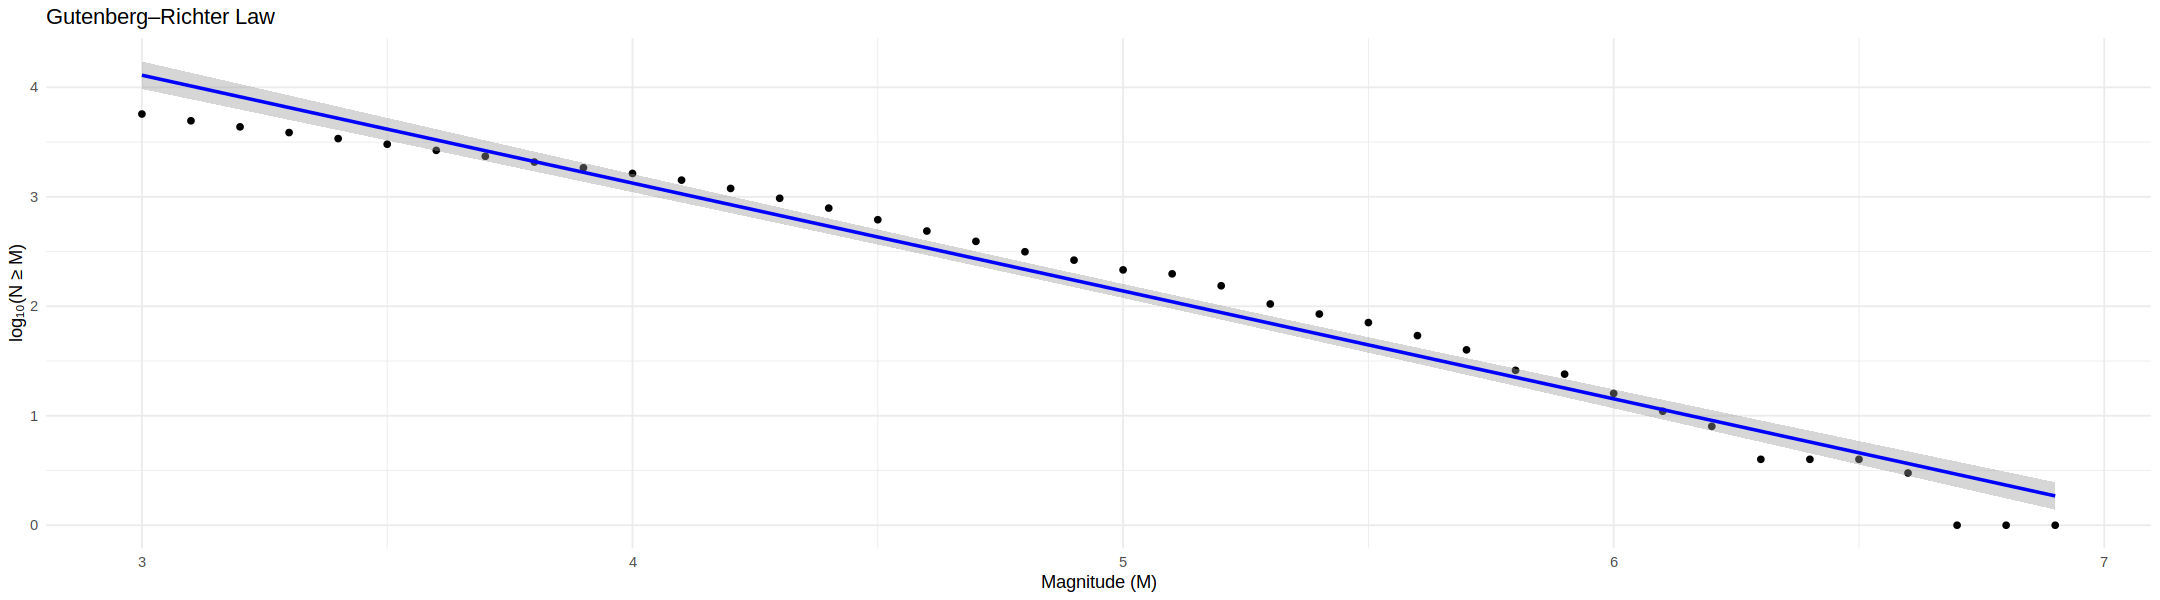

In [12]:
# let's create a dataframe with results for the PLOT
gut_rich <- data.frame(
    mag_lim = mag_values,
    y_counts = y_counts
)

# let's create a filter to exclude the case of log10(0):
gut_rich_clean <- gut_rich[ gut_rich$y_counts > 0, ]

ggplot(gut_rich_clean, aes(x = mag_lim, y = log10(y_counts))) +
  geom_point() +
  geom_smooth(method = "lm", color = "blue") +
  labs(title = "Gutenberg–Richter Law",
       x = "Magnitude (M)",
       y = "log₁₀(N ≥ M)") +
  theme_minimal()

options(repr.plot.width=18, repr.plot.height=7)

In [13]:
model <- lm(log10(y_counts) ~ mag_lim, data = gut_rich_clean)

coeffs <- coef(model)
ci <- confint(model)
a <- coeffs[1]        # intercept
b <- -coeffs[2]       # negative slope, because of how it is defined

cat("Estimated a:", a, "\n")
cat("95% CI for a (intercept):", ci[1,1], "to", ci[1,2], "\n\n")
cat("Estimated b:", b, "\n")
cat("95% CI for b (slope):", -ci[2,2], "to", -ci[2,1], "\n")  # remember to flip the sign

Estimated a: 7.067159 
95% CI for a (intercept): 6.784734 to 7.349585 

Estimated b: 0.9854532 
95% CI for b (slope): 0.9298883 to 1.041018 


### DEPTH DISTRIBUTION
Let's study the depth distribution of the earthquakes.

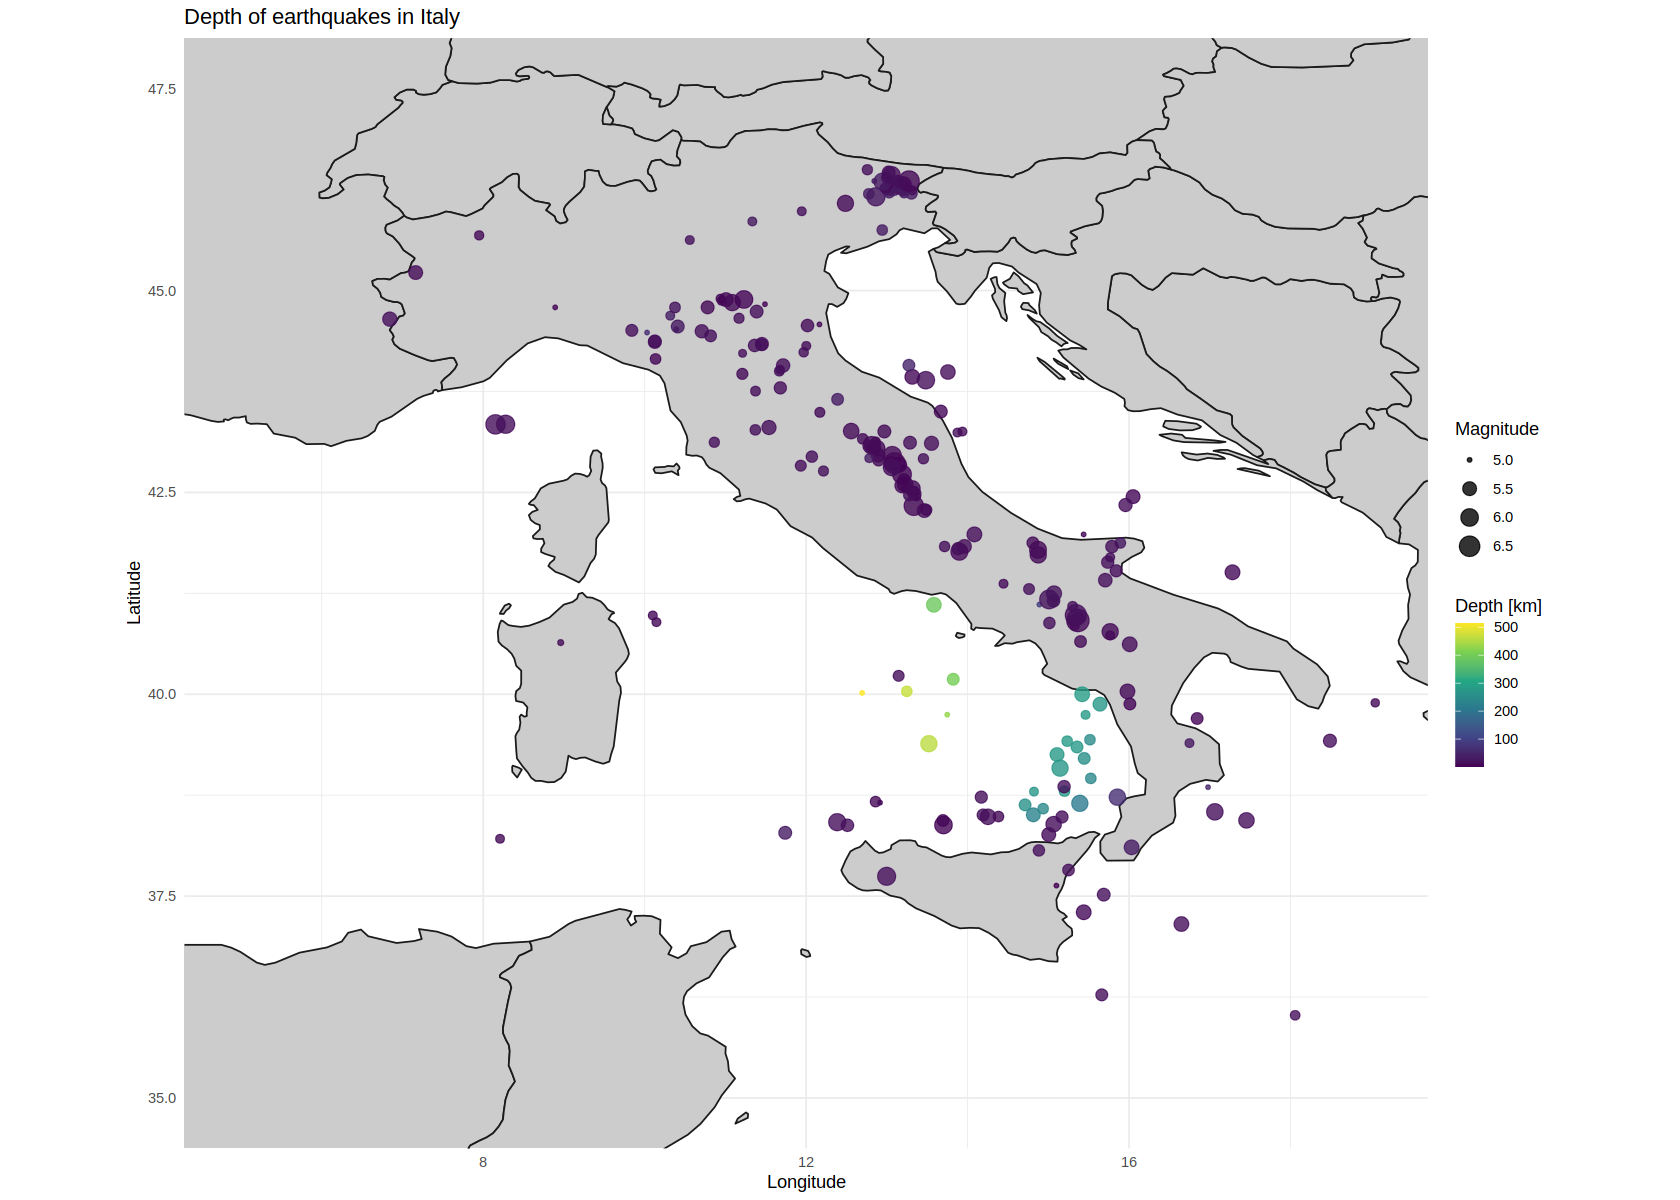

In [34]:
options(repr.plot.width=14, repr.plot.height=10)

ggplot( df[ filt_big_magnitude & filt_italy , ] , aes(x = longitude, y = latitude)) +
  # let's draw the map outline of Italy using the "maps" package
  borders("world", 
          regions = c("Italy", "Germany", "Switzerland", "France", "Austria", "Slovenia", "Croatia", 
                      "Greece", "Albania", 'Bosnia and Herzegovina', 'Hungary', 'Slovakia', 'Liechtenstein', 'Montenegro', 
                      'Serbia', 'Kosovo', 'Romania', 'North Macedonia', 'Tunisia', 'Algeria'), 
          fill = "gray80", colour = "gray10") +
  geom_point(aes(size = mag, color = depth), alpha = 0.8) +
  coord_fixed(xlim = c(5, 19), ylim = c(35, 47.5)) +    #  ensures the aspect ratio is preserved, so the map doesn’t look stretched
  scale_color_viridis_c() +
  labs(title = "Depth of earthquakes in Italy",
       x = "Longitude", y = "Latitude", color = "Depth [km]", size = "Magnitude") +
  theme_minimal()


It's clear the presence of a deep seismic active zone between Sicilia and Calabria regions. Let's study better the depth distribution:

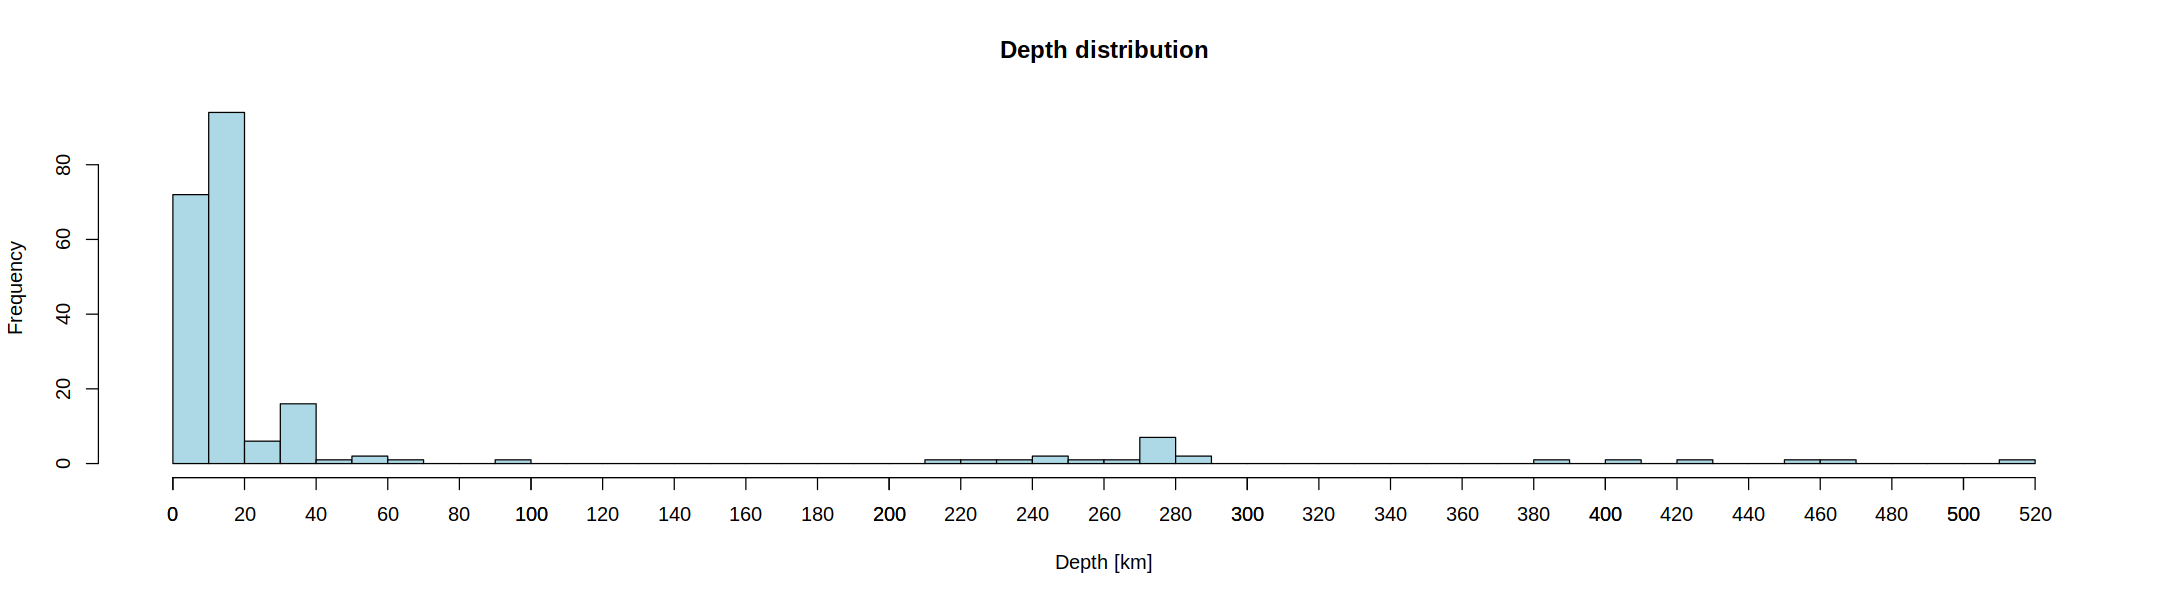

In [30]:
hist( df[ filt_big_magnitude & filt_italy , ]$depth, breaks=50,
    main="Depth distribution", xlab='Depth [km]', col='lightblue')
axis(side = 1, at = seq(0, 520, by = 20))

options(repr.plot.width=18, repr.plot.height=5)

We can identify three main depth zones:
* 0-100 km, with a peak at low depth
* 200-300 km
* 380-520 km

The last two zones coincide exactly with the high depth zone seen in the map.

The deep earthquakes we see in the sea northwest of Sicily and west of Calabria are almost certainly due to the subduction of the Ionian plate beneath the Calabrian arc. This area is one of Europe’s most active deep seismic zones, and its depth pattern strongly supports the presence of a steeply dipping, active subduction zone. This conncets with notorious volanos in the zone (Vesuvio, Etna, Stromboli, Vulcano...).

ADD MAP WITH TECTONIC PLATES.